###  Background: 

 #### AllLife Bank wants to focus on its credit card customer base in the next
financial year. They have been advised by their marketing research team, that the
penetration in the market can be improved. Based on this input, the Marketing team
proposes to run personalised campaigns to target new customers as well as upsell to
existing customers. Another insight from the market research was that the customers
perceive the support services of the back poorly. Based on this, the Operations team
wants to upgrade the service delivery model, to ensure that customers queries are
resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the
Data Science team for help.

##### Objective: To identify different segments in the existing customer based on their
spending patterns as well as past interaction with the bank. 

**Data Description**:

 Data is of various customers of a bank with their credit limit, the total number of credit
cards the customer has, and different channels through which customer has
contacted the bank for any queries, different channels include visiting the bank,
online and through a call centre. 


**Questions to be Answered**:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

In [1]:


# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns


# to scale the data using z-score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import pdist, cdist

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet


In [2]:
# loading the dataset
data = pd.read_excel("Credit Card Customer Data.xlsx")

In [3]:
data.shape

(660, 7)

 . The dataset has 660 rows and 7 columns

In [4]:
# viewing a random sample of the dataset
data.sample(n=10, random_state=1)

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
547,548,38125,26000,4,5,2,4
353,354,94437,9000,5,4,1,3
499,500,65825,68000,6,4,2,2
173,174,38410,9000,2,1,5,8
241,242,81878,10000,4,5,1,3
341,342,70779,18000,4,3,2,0
647,648,79953,183000,9,0,9,2
218,219,28208,19000,3,1,5,7
120,121,16577,10000,4,2,4,6
134,135,31256,13000,4,1,5,7


In [5]:
# copying the data to another variable to avoid any changes to original data
df = data.copy()

###  Sl_No is not needed for the  model , we can drop it 

In [6]:
# dropping the serial no. column as it does not provide any information
df.drop("Sl_No", axis=1, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Customer Key         660 non-null    int64
 1   Avg_Credit_Limit     660 non-null    int64
 2   Total_Credit_Cards   660 non-null    int64
 3   Total_visits_bank    660 non-null    int64
 4   Total_visits_online  660 non-null    int64
 5   Total_calls_made     660 non-null    int64
dtypes: int64(6)
memory usage: 31.1 KB


**Observations**

- *Customer Key* is a categorical variable with 600 customers that indicate each customer individually.
- The 5 variables are of type *int* (integer).

In [8]:
df = df.rename(columns={"Customer Key": "Customer_Key"})
df["Customer_Key"] = pd.Categorical(df.Customer_Key)

df = df.rename(columns={"Customer_Key": "Customer Key"})

In [9]:
df.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,660.000000,660.000000,660.000000,660.000000,660.000000
mean,34574.242424,4.706061,2.403030,2.606061,3.583333
std,37625.487804,2.167835,1.631813,2.935724,2.865317
min,3000.000000,1.000000,0.000000,0.000000,0.000000
25%,10000.000000,3.000000,1.000000,1.000000,1.000000
50%,18000.000000,5.000000,2.000000,2.000000,3.000000
75%,48000.000000,6.000000,4.000000,4.000000,5.000000
max,200000.000000,10.000000,5.000000,15.000000,10.000000


**Observations**

- The mean value of Avg_Credit_Limit is 34574.242424, indicating that most of the values are haveing outliars with extreme.
- The mean value of Total_Credit_Cards is 4.706061, indicating that most of the credit cards are from ranging to 1 to 10.
- The mean value of Total_visits_bank is 2.403030, indicating that most of the visits are raning upto 4 so its godo balanced
- The mean value of Total_visits_online is 2.606061, indicating that they are not even visiting to highly visiting online.
- The mean value of Total_calls_made is 3.583333, indicating that most of the calls made for inquiry are upto 10 from 0.


In [10]:
# checking for missing values
df.isna().sum()

Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

- There are no missing values in our data

In [11]:
df.Total_Credit_Cards.describe()

count    660.000000
mean       4.706061
std        2.167835
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       10.000000
Name: Total_Credit_Cards, dtype: float64

## EDA

In [12]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

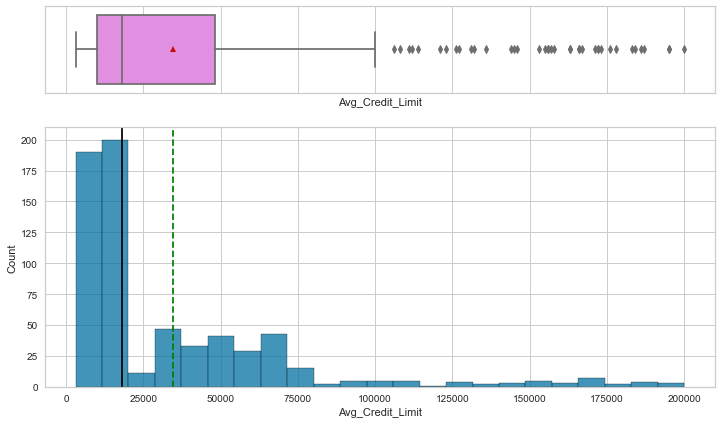

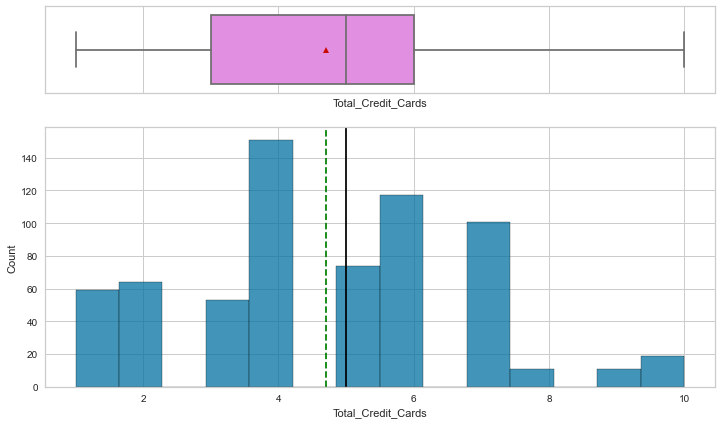

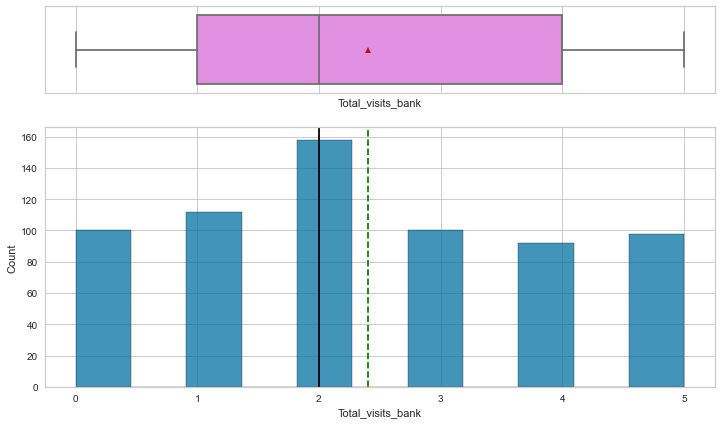

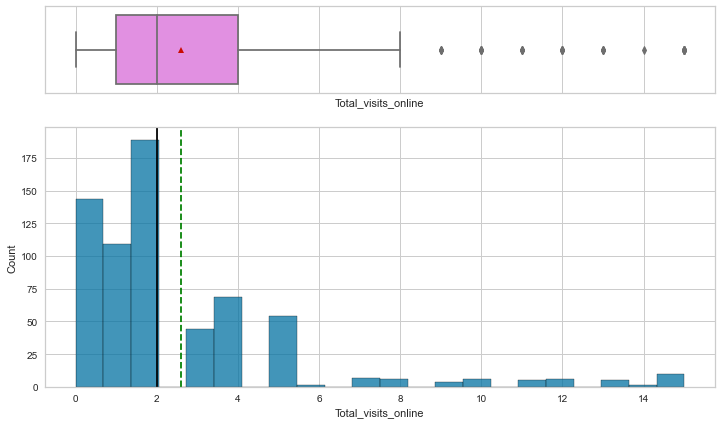

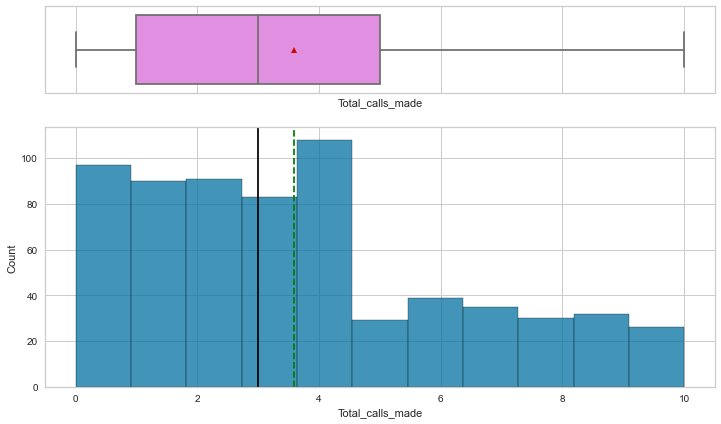

In [13]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    if item != "Customer Key":
        histogram_boxplot(df, item)

**Observations**

- Avg_Credit_Limit, Total_visits_online and Total_visits_bank have right-skewed distributions with  outliers.
- The customers do visit online, physical bank and also call which is good mixture for clustering. 
- Total_Credit_Cards is left-skewed and most of the ratings are between 4 and 6.

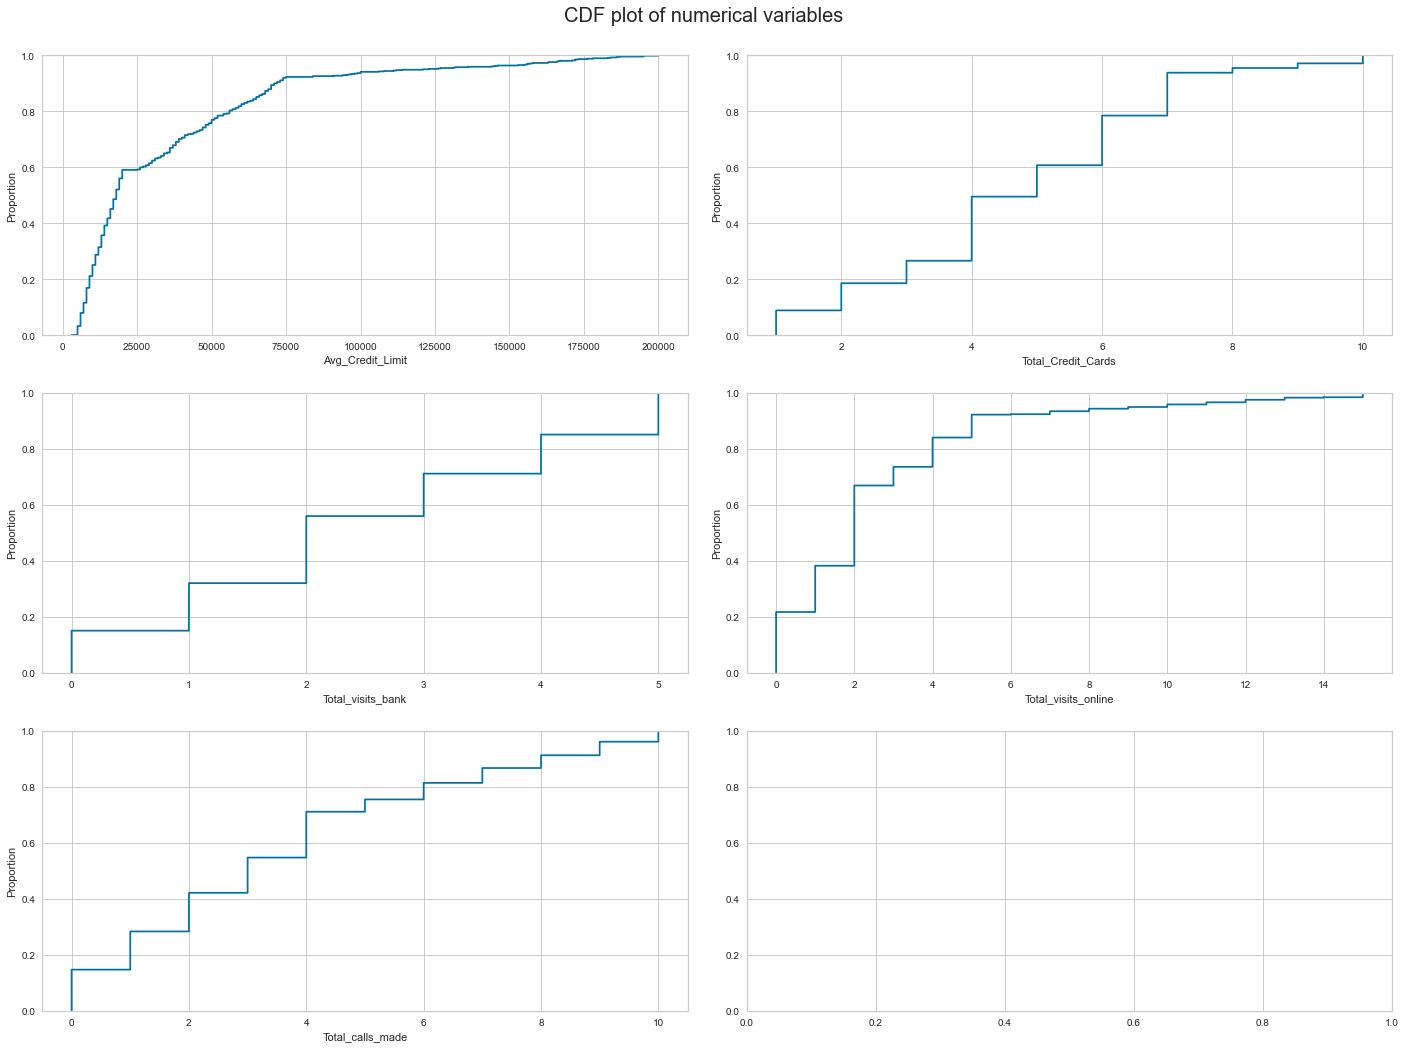

In [14]:
fig, axes = plt.subplots(3, 2, figsize=(20, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)
counter = 0
for ii in range(3):
    sns.ecdfplot(ax=axes[ii][0], x=df[num_col[counter]])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(ax=axes[ii][1], x=df[num_col[counter]])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

**Observations**

- 90% of the customers have Avg_Credit_Limit less than 175000.
- 80% of the customers have a total visits online are between 4 and 6.
- 75% of the customers have total vists to banks are 4.
- Almost all customers have 5 or fewer visits to banks.

In [15]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

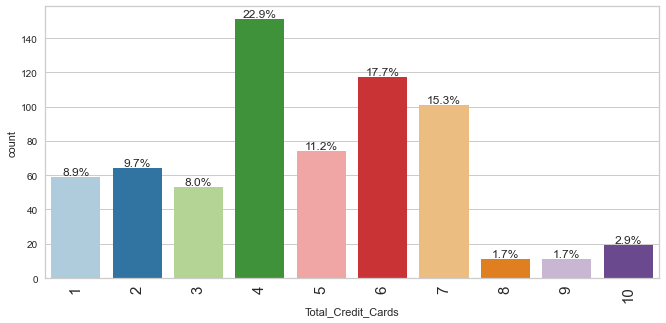

In [16]:
# let's explore Total_Credit_Cards further
labeled_barplot(df, "Total_Credit_Cards", perc=True)

**Observations**

- 22.9% of CUSTOMERS  have 4 credit cards, they are highest number of customers.
- Customers with 4,5,6,7 credit cards consist of  67% of accounts 

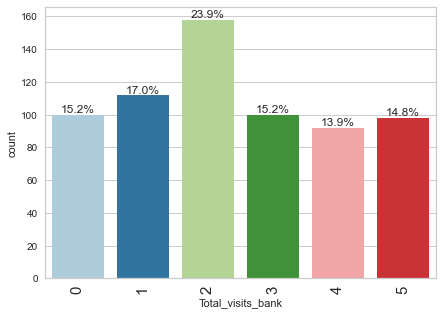

In [17]:
# let's explore Total_visits_bank further
labeled_barplot(df, "Total_visits_bank", perc=True)

**Observations**

- 40% of CUSTOMERS   pay atleast once a visit to the bank

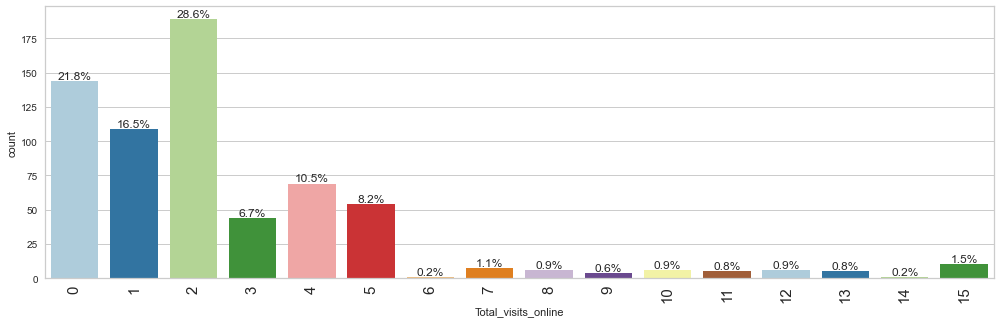

In [18]:
# let's explore Total_visits_online further
labeled_barplot(df, "Total_visits_online", perc=True)

**Observations**

- 42% of CUSTOMERS   pay atleast once a visit online bank services

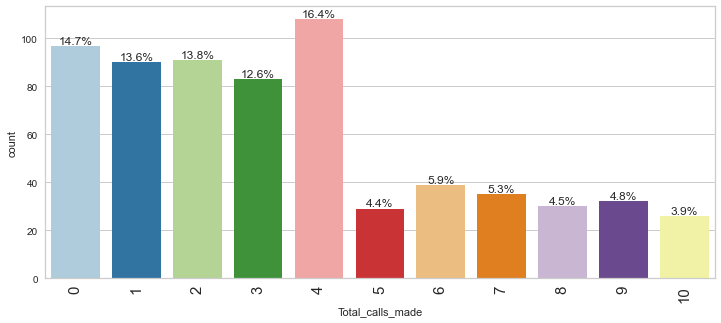

In [19]:
# let's explore Total_calls_made further
labeled_barplot(df, "Total_calls_made", perc=True)

## Bivariate Analysis

**Let's check for correlations between the variables.**

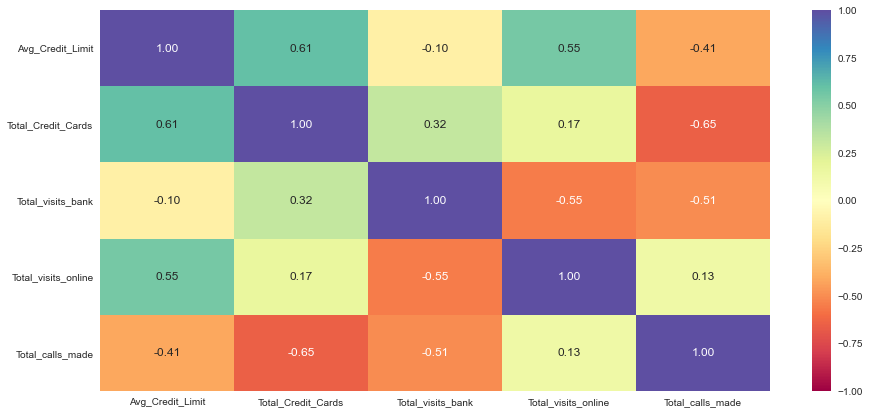

In [20]:
plt.figure(figsize=(15, 7))
sns.heatmap(df[num_col].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

**Observations**

- The Avg_Credit_Limit, Total_visits_bank and the Total_Credit_Cards are highly positively correlated, which is obvious.
- The Total_calls_made and the Avg_Credit_Limit are highly negatively correlated, which is obvious.
- The Total_visits_online and  Total_visits_bank are negatively correlated, which is obvious.

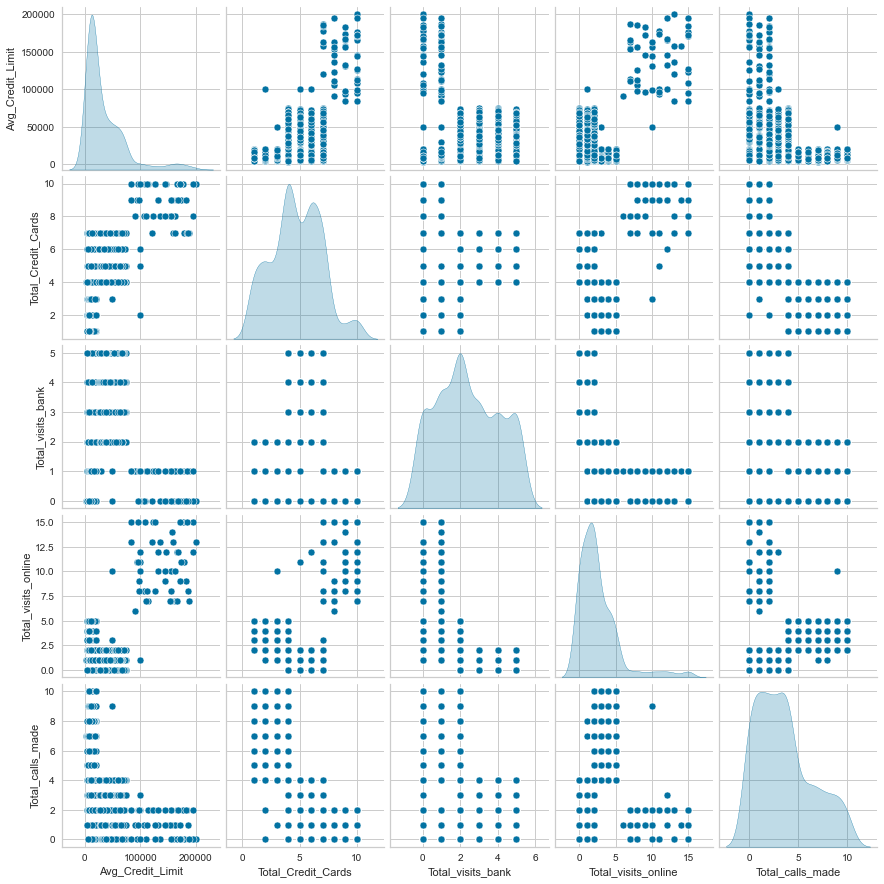

In [21]:
sns.pairplot(data=df[num_col], diag_kind="kde")
plt.show()

**Observations**

- Average credit card limit shows most cusomters have lower side of limit but  mean shows higher because  outliars are very high values and they are responsible for skewed values. 
- Total Credit Cards  seem to be evenly distributed.

## Data Preprocessing

In [22]:
# variables used for clustering
num_col

['Avg_Credit_Limit',
 'Total_Credit_Cards',
 'Total_visits_bank',
 'Total_visits_online',
 'Total_calls_made']

 **Customer Key Variable insights**:

In [23]:
df[df.duplicated(["Customer Key"], keep=False)].sort_values("Customer Key")

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,37252,6000,4,0,2,8
432,37252,59000,6,2,1,2
4,47437,100000,6,0,12,3
332,47437,17000,7,3,1,0
411,50706,44000,4,5,0,2
541,50706,60000,7,5,2,2
391,96929,13000,4,5,0,0
398,96929,67000,6,2,2,2
104,97935,17000,2,1,2,10
632,97935,187000,7,1,7,0


 *Observations**:
 
        -We see multiple data entry errors, interestingly only customer key is same but all other values are different
        -So we can keep them and value the insights
        
        

# Scaling 

In [24]:
# scaling the dataset before clustering
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [81]:
# creating a dataframe of the scaled columns
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df_h = pd.DataFrame(subset_scaled, columns=subset.columns)
subset_scaled_df_h_avg = pd.DataFrame(subset_scaled, columns=subset.columns)


# PCA data frame 

In [26]:
# independant variables
df_PCA = df.copy()

In [27]:
# df_PCA.insert(len(df_PCA.columns), "PCA_Result", "")

In [28]:
# independant variables
X_PCA = df_PCA.drop(["Customer Key"], axis=1)

In [29]:
# independant variables
# X_PCA = df_PCA.drop(["PCA_Result"], axis=1)

In [30]:
# the dependent variable
# y_PCA = df_PCA[["PCA_Result"]]

In [31]:
from scipy.stats import zscore

XScaled = X_PCA.apply(zscore)
XScaled.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537
1,0.410293,-0.787585,-1.473731,2.520519,1.891859
2,0.410293,1.058973,-0.860451,0.134290,0.145528
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528
4,1.740187,0.597334,-1.473731,3.202298,-0.203739


In [32]:
covMatrix = np.cov(XScaled, rowvar=False)
print(covMatrix)

[[ 1.00151745  0.60978441 -0.10046453  0.55222122 -0.41498065]
 [ 0.60978441  1.00151745  0.31627526  0.16801286 -0.65223974]
 [-0.10046453  0.31627526  1.00151745 -0.55269882 -0.50678371]
 [ 0.55222122  0.16801286 -0.55269882  1.00151745  0.12749255]
 [-0.41498065 -0.65223974 -0.50678371  0.12749255  1.00151745]]


In [33]:
pca = PCA(n_components=5)
pca.fit(XScaled)

PCA(n_components=5)

The eigen Values

In [34]:
print(pca.explained_variance_)

[2.29029906 1.87416377 0.3205531  0.27826563 0.24430569]


The eigen Vectors

In [35]:
print(pca.components_)

[[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]
 [ 0.00346147 -0.28498293 -0.6135219  -0.3049481  -0.67035086]
 [ 0.30861651 -0.74135216  0.44527763  0.31838769 -0.23560546]
 [-0.70933671  0.10512237  0.05058609  0.59220036 -0.36404738]]


And the percentage of variation explained by each eigen Vector

In [36]:
print(pca.explained_variance_ratio_)

[0.45736578 0.37426483 0.06401348 0.0555688  0.04878711]


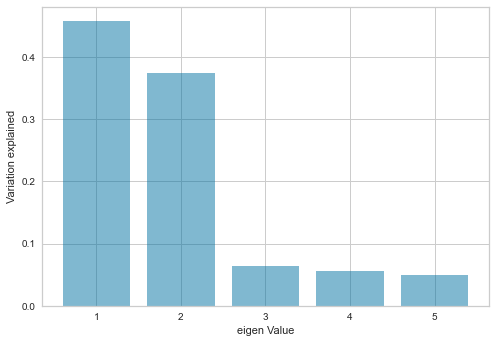

In [37]:
plt.bar(list(range(1, 6)), pca.explained_variance_ratio_, alpha=0.5, align="center")
plt.ylabel("Variation explained")
plt.xlabel("eigen Value")
plt.show()

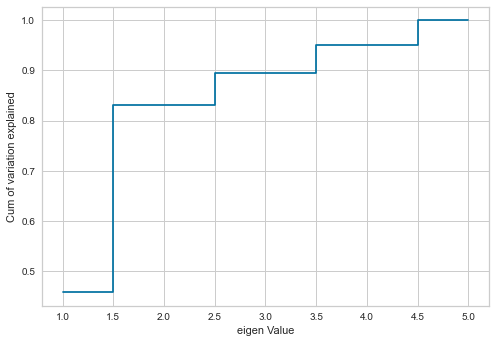

In [38]:
plt.step(list(range(1, 6)), np.cumsum(pca.explained_variance_ratio_), where="mid")
plt.ylabel("Cum of variation explained")
plt.xlabel("eigen Value")
plt.show()

## Hierarchical Clustering

In [39]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(subset_scaled_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553606.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875361.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [40]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


-Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [41]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(subset_scaled_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


In [42]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with average linkage.


**We see that the cophenetic correlation is maximum with Euclidean distance and centroid linkage.**

**Let's see the dendrograms for the different linkage methods.**

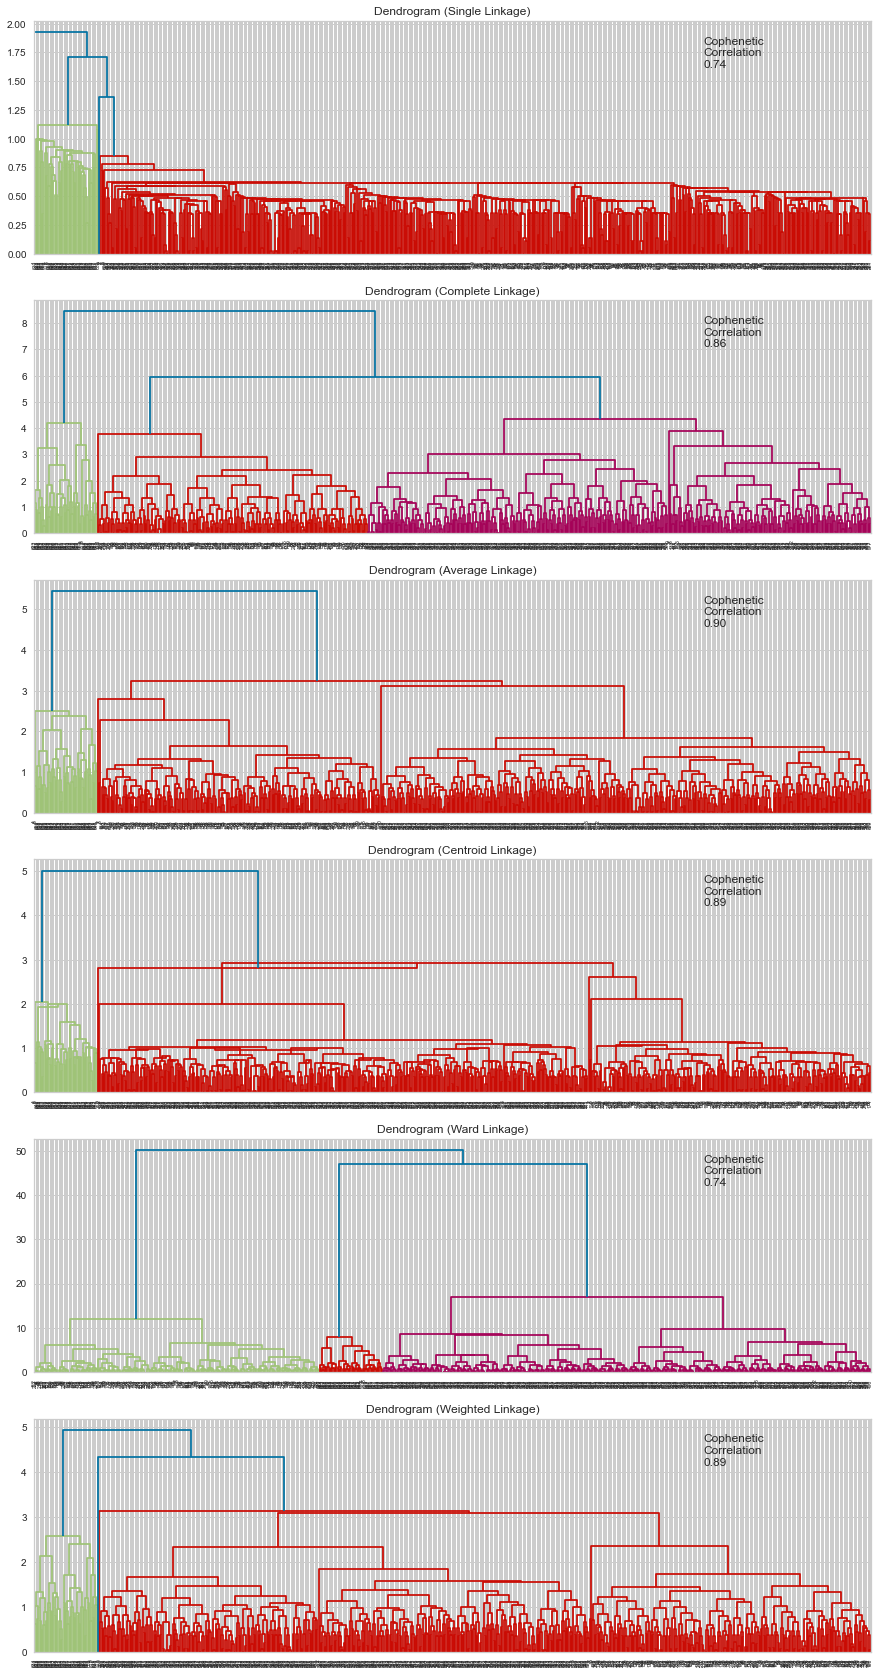

In [43]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(subset_scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(subset_scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

In [44]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="average")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(linkage='average', n_clusters=6)

In [45]:
HCmodel_complete = AgglomerativeClustering(
    n_clusters=5, affinity="euclidean", linkage="complete"
)
HCmodel_complete.fit(subset_scaled_df)

AgglomerativeClustering(linkage='complete', n_clusters=5)

In [46]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df_PCA["HC_Clusters"] = HCmodel.labels_

For n_clusters = 0, the silhouette score is 0.5085507872887557)
For n_clusters = 1, the silhouette score is 0.5085507872887557)
For n_clusters = 2, the silhouette score is 0.5085507872887557)
For n_clusters = 3, the silhouette score is 0.5085507872887557)
For n_clusters = 4, the silhouette score is 0.5085507872887557)
For n_clusters = 5, the silhouette score is 0.5085507872887557)
For n_clusters = 6, the silhouette score is 0.5085507872887557)
For n_clusters = 7, the silhouette score is 0.5085507872887557)
For n_clusters = 8, the silhouette score is 0.5085507872887557)
For n_clusters = 9, the silhouette score is 0.5085507872887557)


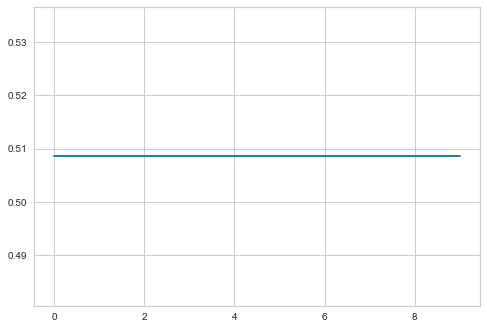

In [47]:
sil_score_hierarchial_avg = []
cluster_list_hierarchial_avg = list(range(0, 10))
for n_clusters_h_avg in cluster_list_hierarchial_avg:
    clusterer_h_avg = AgglomerativeClustering(
        n_clusters=6, affinity="euclidean", linkage="average"
    )

    preds_h_avg = clusterer_h_avg.fit_predict((subset_scaled_df))
    # centers = clusterer_h_avg.cluster_centers_
    score_h_avg = silhouette_score(subset_scaled_df, preds_h_avg)
    sil_score_hierarchial_avg.append(score_h_avg)
    print(
        "For n_clusters = {}, the silhouette score is {})".format(
            n_clusters_h_avg, score_h_avg
        )
    )

plt.plot(cluster_list_hierarchial_avg, sil_score_hierarchial_avg)
plt.show()

For n_clusters = 0, the silhouette score is 0.4813468152538688)
For n_clusters = 1, the silhouette score is 0.4813468152538688)
For n_clusters = 2, the silhouette score is 0.4813468152538688)
For n_clusters = 3, the silhouette score is 0.4813468152538688)
For n_clusters = 4, the silhouette score is 0.4813468152538688)
For n_clusters = 5, the silhouette score is 0.4813468152538688)
For n_clusters = 6, the silhouette score is 0.4813468152538688)
For n_clusters = 7, the silhouette score is 0.4813468152538688)
For n_clusters = 8, the silhouette score is 0.4813468152538688)
For n_clusters = 9, the silhouette score is 0.4813468152538688)


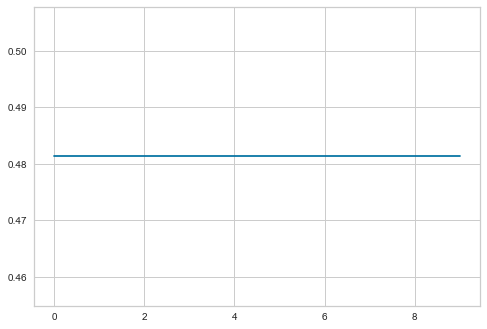

In [48]:
sil_score_hierarchial = []
cluster_list_hierarchial = list(range(0, 10))
for n_clusters_h in cluster_list_hierarchial:
    clusterer_h = AgglomerativeClustering(
        n_clusters=5, affinity="euclidean", linkage="complete"
    )
    preds_h = clusterer_h.fit_predict((subset_scaled_df))
    # centers = clusterer_h.cluster_centers_
    score_h = silhouette_score(subset_scaled_df, preds_h)
    sil_score_hierarchial.append(score_h)
    print(
        "For n_clusters = {}, the silhouette score is {})".format(n_clusters_h, score_h)
    )

plt.plot(cluster_list_hierarchial, sil_score_hierarchial)
plt.show()

## Cluster Profiling

In [49]:
cluster_profile = df_PCA.groupby("HC_Clusters").mean()

In [50]:
cluster_profile["count_in_each_segments"] = (
    df_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

In [51]:
# let's see the different types of customers
for cl in df_PCA["HC_Clusters"].unique():
    print("In cluster {}, the following customers are present:".format(cl))
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print()

In cluster 3, the following customers are present:
[87073]
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]

In cluster 4, the following customers are present:
[38414]
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]

In cluster 2, the following customers are present:
[17341, 40496, 54838, 35254, 46635, ..., 90191, 49341, 11562, 16253, 80623]
Length: 384
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]

In cluster 5, the following customers are present:
[47437, 48370]
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]

In cluster 1, the following customers are present:
[58634, 37376, 82490, 44770, 52741, ..., 51773, 96163, 61234, 55849, 56156]
Length: 222
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]

In cluster 0, the following customers are present:
[94391, 50598, 40019, 77910, 89832, ..., 51108,

**We see that there are 6 clusters of customer keys,clusters are not easily segmented and they do have many overlaps, as the clusters do not have enough variability, we need better classification .**

**Let us try using Ward linkage as it has more distinct and separated clusters (as seen from it's dendrogram before). 6 appears to be the appropriate number of clusters from the dendrogram for Ward linkage.**

## Ward Linkage

In [52]:
HCmodel = AgglomerativeClustering(n_clusters=6, affinity="euclidean", linkage="ward")
HCmodel.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=6)

In [53]:
subset_scaled_df["HC_Clusters"] = HCmodel.labels_
df_PCA["HC_Clusters"] = HCmodel.labels_

## Cluster Profiling

In [54]:
cluster_profile = df_PCA.groupby("HC_Clusters").mean()

In [55]:
cluster_profile["count_in_each_segments"] = (
    df_PCA.groupby("HC_Clusters")["Customer Key"].count().values
)

In [56]:
# let's see the names of the countries in each cluster
for cl in df_PCA["HC_Clusters"].unique():
    print(
        "The",
        df_PCA[df_PCA["HC_Clusters"] == cl]["Customer Key"].nunique(),
        "Customer Key in cluster",
        cl,
        "are:",
    )
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Customer Key"].unique())
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Total_Credit_Cards"].unique())
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Total_visits_bank"].unique())
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Total_visits_online"].unique())
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Total_calls_made"].unique())
    print(df_PCA[df_PCA["HC_Clusters"] == cl]["Avg_Credit_Limit"].median())

    print("-" * 100, "\n")

The 196 Customer Key in cluster 0 are:
[87073, 17341, 40496, 54838, 35254, ..., 85234, 31948, 90191, 11562, 16253]
Length: 196
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]
[2 7 5 6 4]
[1 2 3 4]
[1 3 0 2]
[0 4 3 1 2]
36000.0
---------------------------------------------------------------------------------------------------- 

The 3 Customer Key in cluster 4 are:
[38414, 47437, 48370]
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]
[3 6 5]
[0]
[10 12 11]
[9 3 2]
100000.0
---------------------------------------------------------------------------------------------------- 

The 131 Customer Key in cluster 3 are:
[58634, 37376, 82490, 44770, 52741, ..., 12122, 28208, 73811, 61234, 56156]
Length: 131
Categories (655, int64): [11265, 11398, 11412, 11466, ..., 99473, 99589, 99596, 99843]
[3 2 4 1]
[0 1 2]
[1 2 5 4 3]
[8 1 2 7 5 6 4]
11000.0
--------------------------------------------------------------------------

**Now the clusters seem to have more variability.**

In [57]:
# lets display cluster profile
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
HC_Clusters,,,,,,
0,37520.408163,5.642857,2.525510,0.974490,2.142857,196
1,29806.282723,5.376963,4.471204,0.994764,1.863874,191
2,142750.000000,8.875000,0.625000,10.875000,1.020833,48
3,11908.396947,2.603053,0.961832,3.358779,5.580153,131
4,83333.333333,4.666667,0.000000,11.000000,4.666667,3
5,12197.802198,2.109890,0.890110,3.780220,8.736264,91


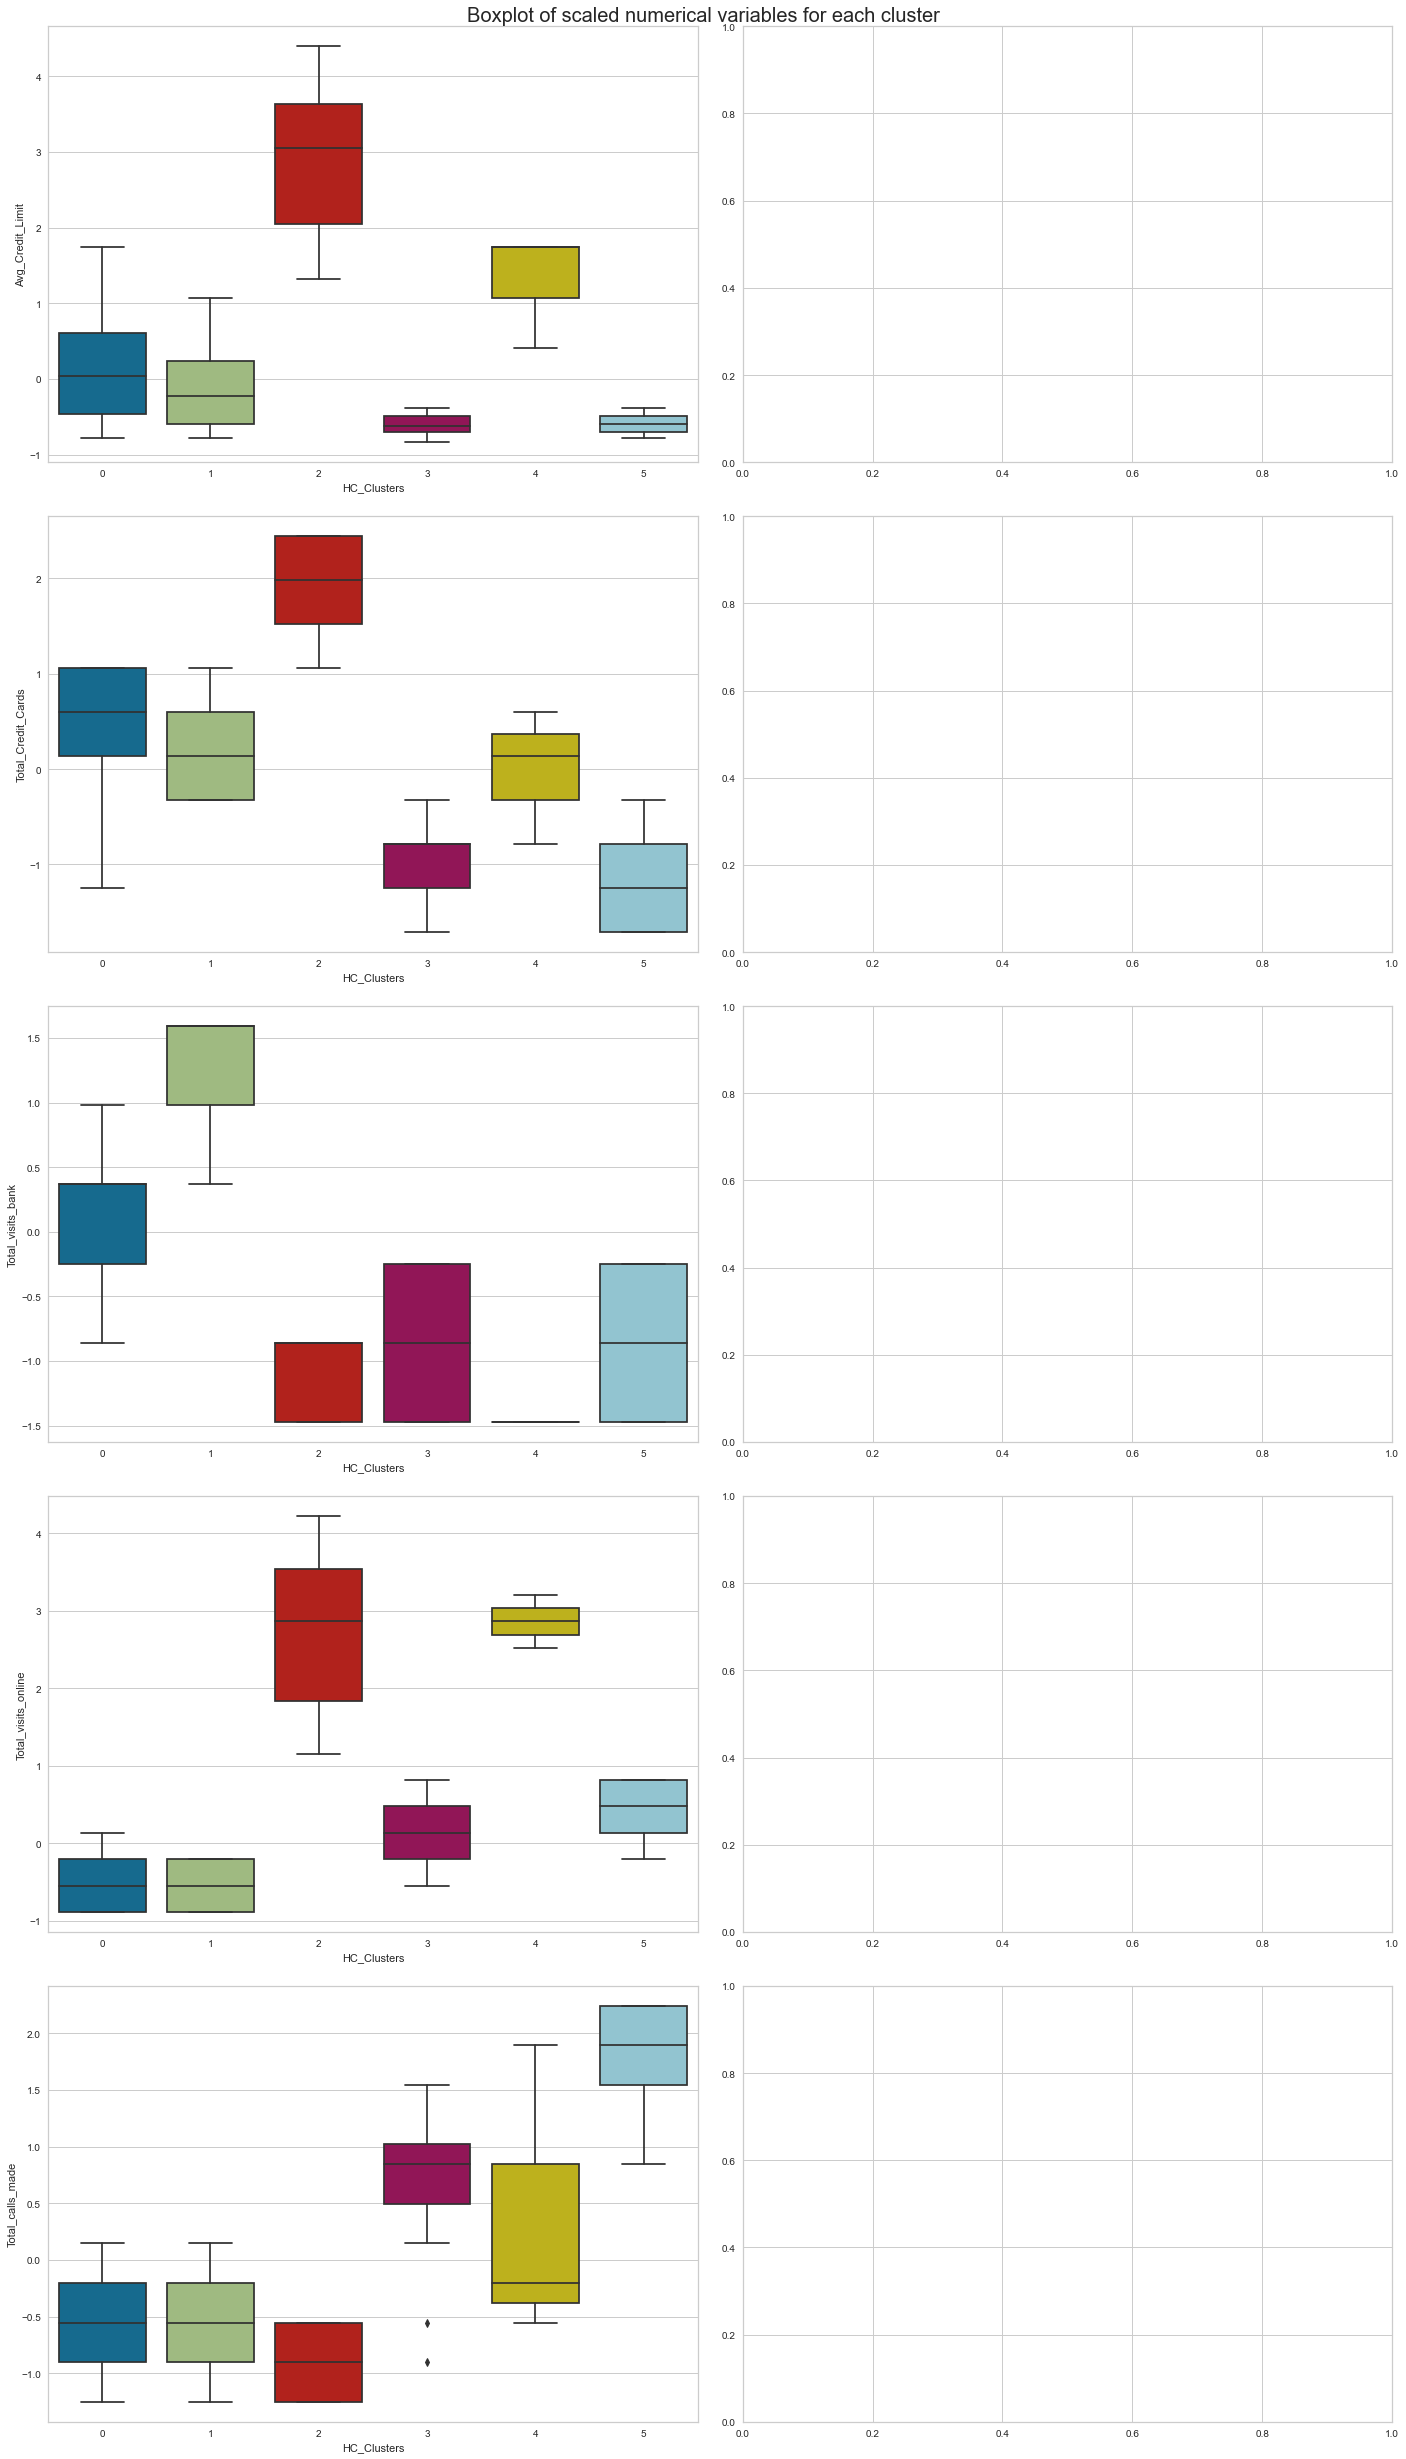

In [58]:
num_cols = df_PCA.select_dtypes(include=np.number).columns.tolist()

fig, axes = plt.subplots(5, 2, figsize=(20, 35))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii][0],
        y=subset_scaled_df[num_cols[counter]],
        x=subset_scaled_df["HC_Clusters"],
    )
    counter = counter + 1


fig.tight_layout(pad=2.0)

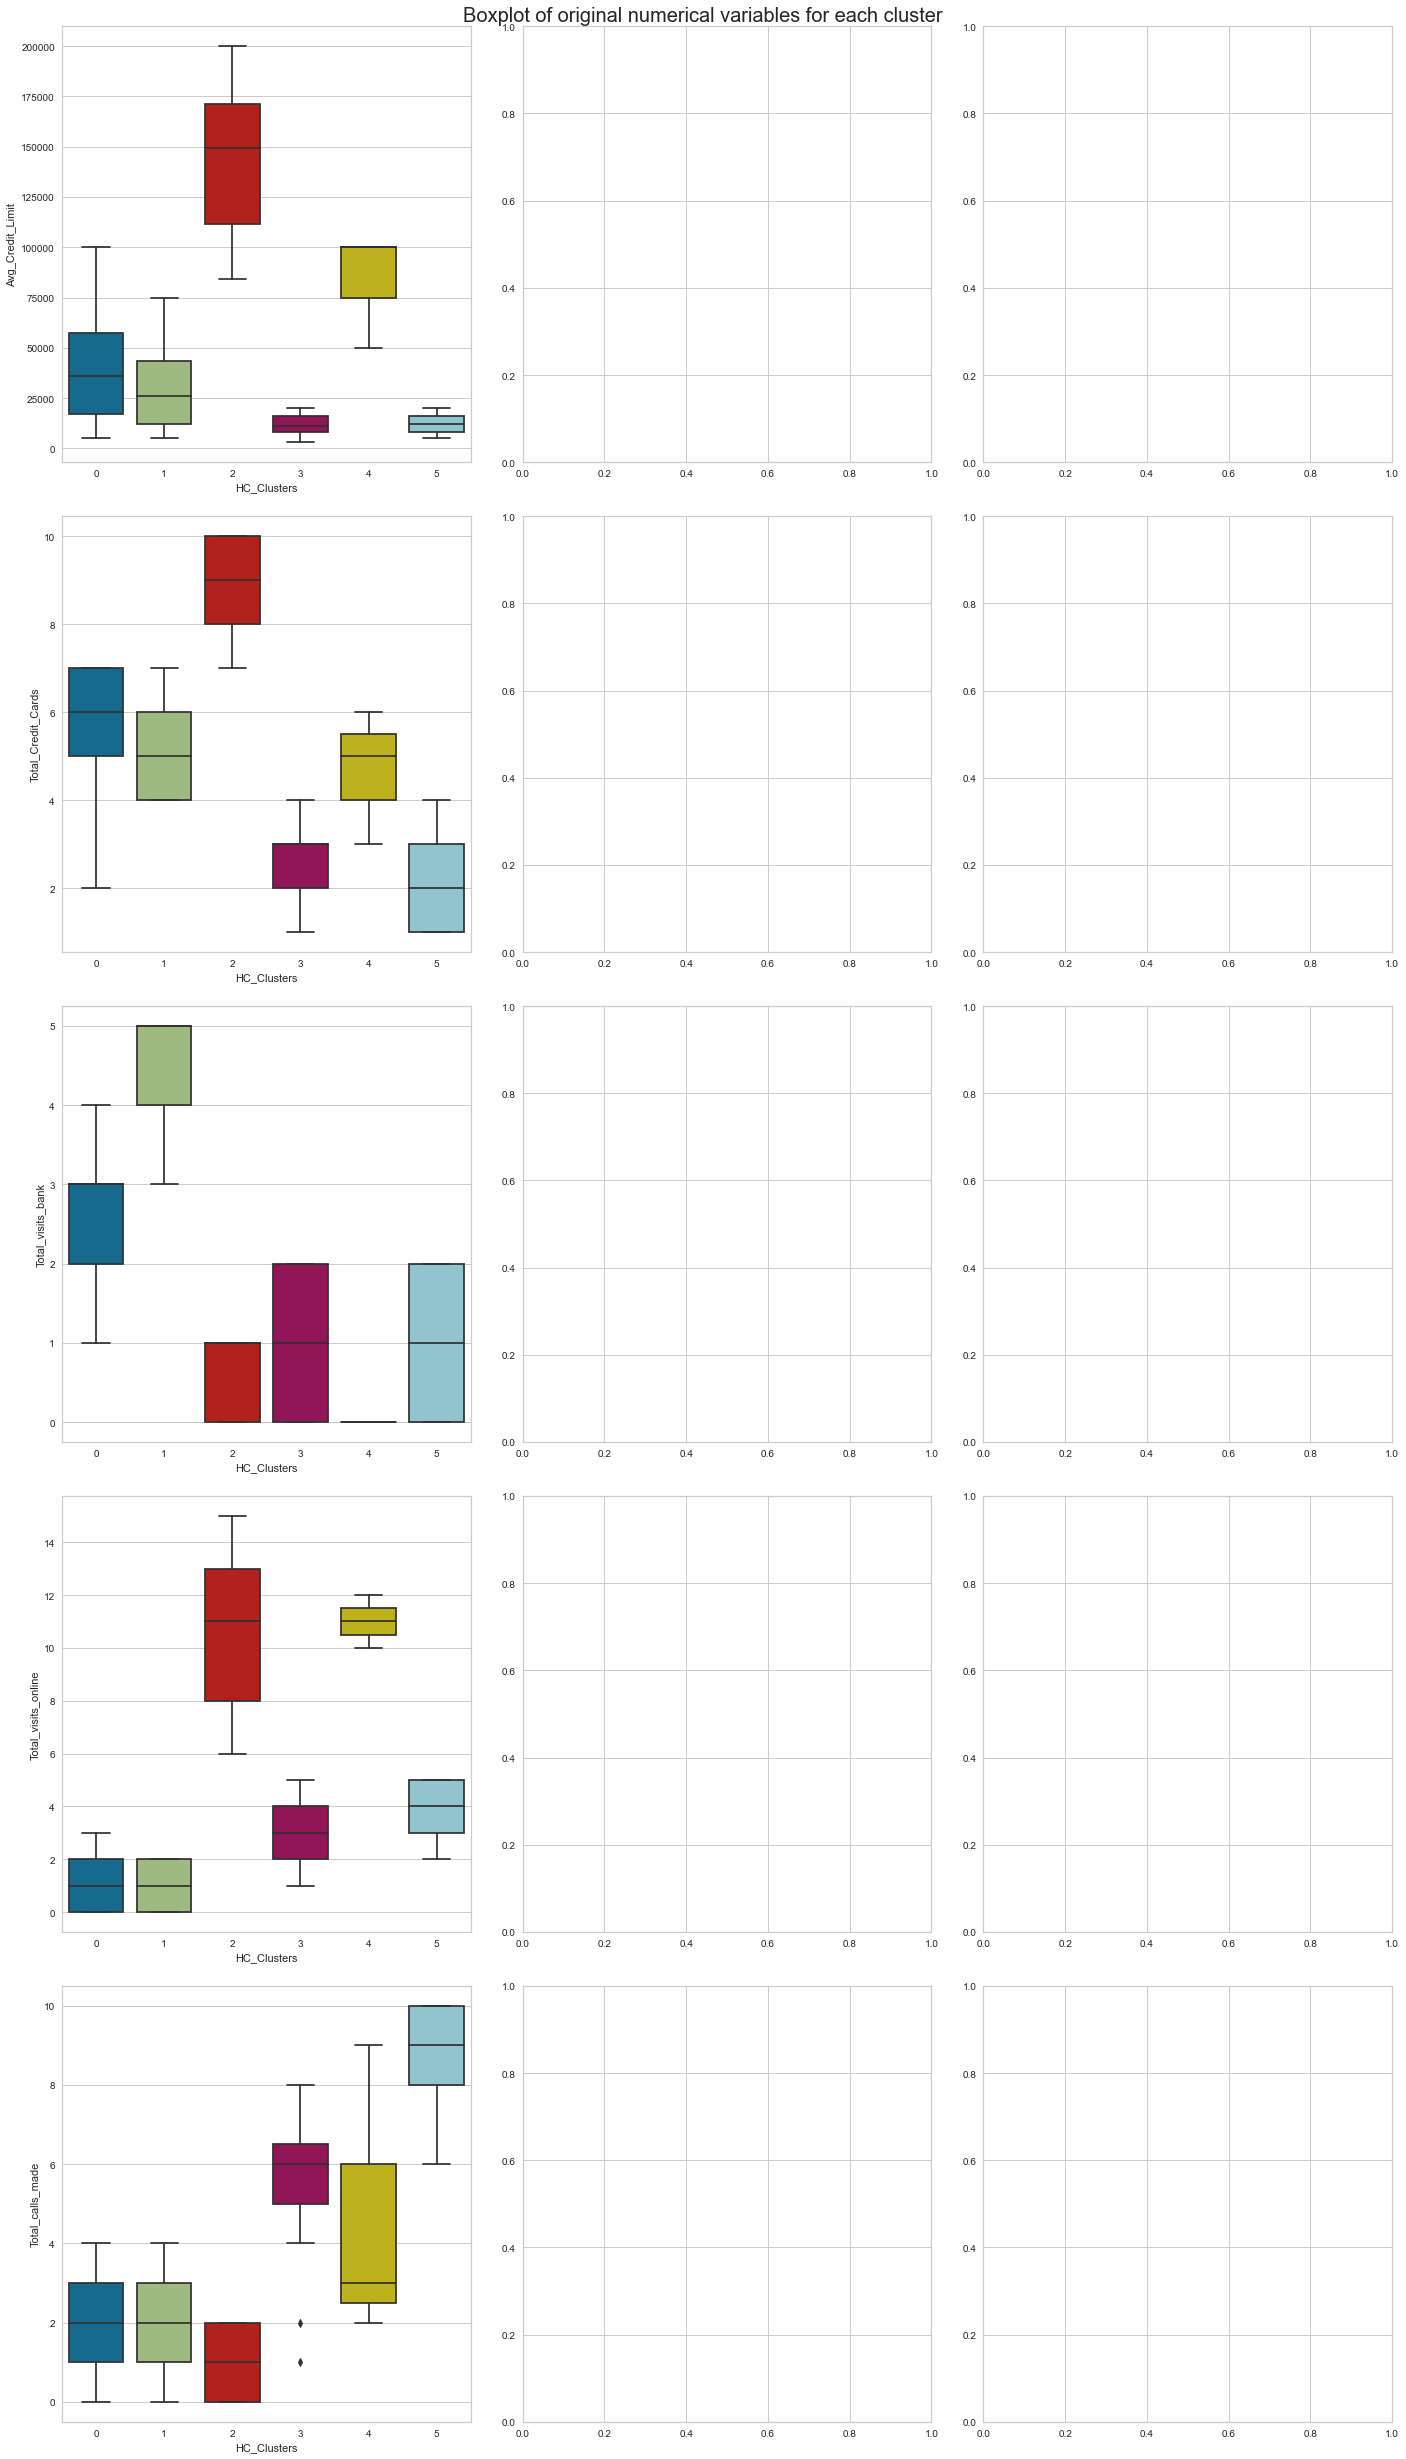

In [59]:
fig, axes = plt.subplots(5, 3, figsize=(20, 35))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii][0], y=df_PCA[num_cols[counter]], x=df_PCA["HC_Clusters"])
    counter = counter + 1


fig.tight_layout(pad=2.0)

## Insights

We will look into clusters 0, 1, 3, and 5 only because the other clusters have only 1 or 2 countries in them.

- **Cluster 0**
   - There are 196 customers in this cluster.
   - Customers typically have 4 - 7 credit Total_Credit_Cards
   - They also vist bank and visit online 

- **Cluster 3**
   - There are 131  customers in this cluster.
   - Customers typically have 1 - 4 credit Total_Credit_Cards
   - They also vist bank and visit online but not as frequest as cluster 5

- **Cluster 1**
   - There are 190  customers in this cluster.
   - Customers typically have 2 - 7 credit Total_Credit_Cards
   - They seldom call the bank

- **Cluster 2 and Cluster 4**
   - They call the bank most often and from 10 to 15 calls. 
   - They visit the bank very less. 
   - They while cluster 2 visits online cluster 4 does not  
   - They call the bank most often and from 10 to 15 calls. 

## Recommendations

**Cluster 3,4  can still b condiered for more credit cards.**


# Dimensionality Reduction

Now 3 dimensions seems very reasonable. With 3 variables we can explain over 95% of the variation in the original data!



In [60]:
pca3 = PCA(n_components=3)
pca3.fit(XScaled)
print(pca3.components_)
print(pca3.explained_variance_ratio_)
Xpca3 = pca3.transform(XScaled)

[[ 0.48885901  0.59767943  0.28049227  0.11178284 -0.55912866]
 [ 0.40323959  0.03017103 -0.58658661  0.66516108  0.22352726]
 [ 0.00346147 -0.28498293 -0.6135219  -0.3049481  -0.67035086]]
[0.45736578 0.37426483 0.06401348]


In [61]:
Xpca3

array([[ 0.50129079,  0.52482909,  1.89586173],
       [-1.45956008,  3.10558756, -0.9068019 ],
       [ 0.52579466,  0.82397914,  0.0890302 ],
       ...,
       [ 2.85144378,  2.98308097,  0.0448878 ],
       [ 4.17825796,  4.58293019, -0.60533647],
       [ 3.16042563,  4.35101851, -0.25437735]])


**Let's scale the data before we proceed to cluster it.**


In [62]:
sc = StandardScaler()
subset_scaled_df = pd.DataFrame(sc.fit_transform(df_PCA), columns=df_PCA.columns,)
subset_scaled_df.head()

,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_Clusters
0,1.246920,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,-1.026528
1,-0.653203,0.410293,-0.787585,-1.473731,2.520519,1.891859,1.336187
2,-1.476098,0.410293,1.058973,-0.860451,0.134290,0.145528,-1.026528
3,-0.571901,-0.121665,0.135694,-0.860451,-0.547490,0.145528,-1.026528
4,-0.300857,1.740187,0.597334,-1.473731,3.202298,-0.203739,1.336187


In [63]:
# importing library
from sklearn.decomposition import PCA

# setting the number of components to 2
pca = PCA(n_components=2)

# transforming data and storing results in a dataframe
X_reduced_pca = pca.fit_transform(subset_scaled_df)
reduced_df_pca = pd.DataFrame(
    data=X_reduced_pca, columns=["Component 1", "Component 2"]
)

In [64]:
# checking the amount of variance explained
pca.explained_variance_ratio_.sum()

0.710004091078412

- The first two principal components explain 48.5% of the variance in the data.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

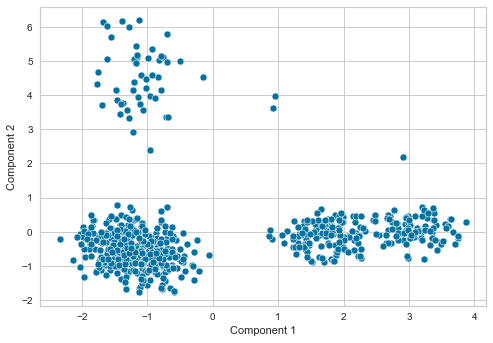

In [65]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")

- We can kind of see two broad clusters if we draw a horizontal line around y=1.
- There a few outlier points too.

Let's colour the scatterplot by cluster labels.

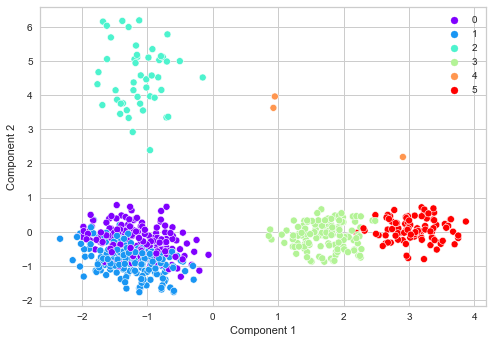

In [66]:
sns.scatterplot(
    data=reduced_df_pca,
    x="Component 1",
    y="Component 2",
    hue=df_PCA["HC_Clusters"],
    palette="rainbow",
)
plt.legend(bbox_to_anchor=(1, 1))

- Cluster 0 and 2 are the major clusters.
- The rest of the data points seem to be mostly outliers.

**Observations**

- The cophenetic correlation is highest for average and centroid linkage methods.
- We will move ahead with average linkage.
- 6 appears to be the appropriate number of clusters from the dendrogram for average linkage.

## K-means Clustering

C:\Users\kisho\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  f"KMeans is known to have a memory leak on Windows "


Number of Clusters: 1 	Average Distortion: 2.474914928476318
Number of Clusters: 2 	Average Distortion: 1.848808138486841
Number of Clusters: 3 	Average Distortion: 1.5644674520220756
Number of Clusters: 4 	Average Distortion: 1.4255102060281724
Number of Clusters: 5 	Average Distortion: 1.339731919355596
Number of Clusters: 6 	Average Distortion: 1.27626609206593
Number of Clusters: 7 	Average Distortion: 1.2204281675483017
Number of Clusters: 8 	Average Distortion: 1.172852231945097


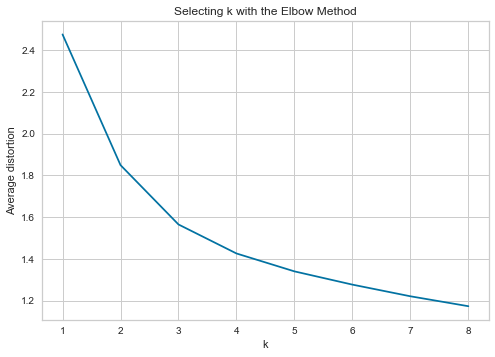

In [67]:
clusters = range(1, 9)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k)
    model.fit(subset_scaled_df)
    prediction = model.predict(subset_scaled_df)
    distortion = (
        sum(
            np.min(cdist(subset_scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / subset_scaled_df.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

**Appropriate value for k seems to be 3 or 5.**

**Let's check the silhouette scores.**

For n_clusters = 2, the silhouette score is 0.40056228590514115)
For n_clusters = 3, the silhouette score is 0.4754401171570223)
For n_clusters = 4, the silhouette score is 0.3347913825786198)
For n_clusters = 5, the silhouette score is 0.2757579658760539)
For n_clusters = 6, the silhouette score is 0.25187449658938244)
For n_clusters = 7, the silhouette score is 0.2544727385313882)
For n_clusters = 8, the silhouette score is 0.24687209753348013)
For n_clusters = 9, the silhouette score is 0.24833724686491696)


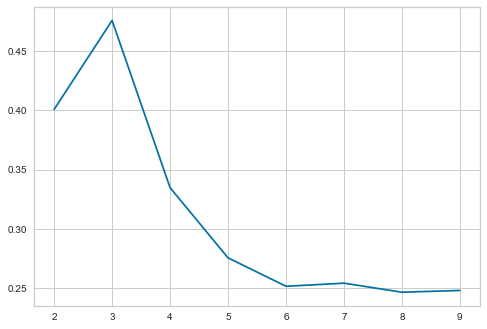

In [68]:
sil_score = []
cluster_list = list(range(2, 10))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict((subset_scaled_df))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(subset_scaled_df, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

**Silhouette score will choosen as 5 as value of k.**

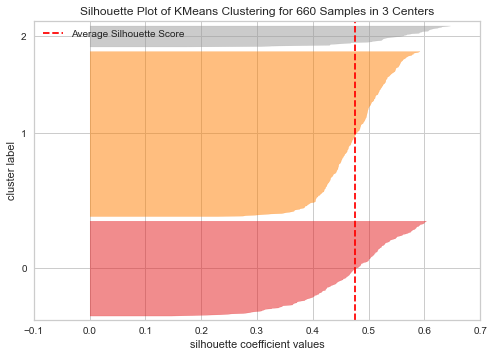

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [69]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

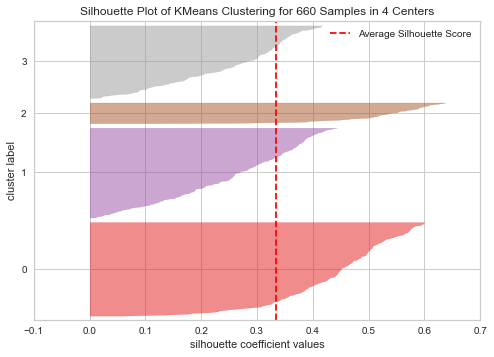

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [70]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(subset_scaled_df)
visualizer.show()

In [71]:
# let's take 4 as number of clusters
kmeans = KMeans(n_clusters=4, random_state=0)
kmeans.fit(subset_scaled_df)

KMeans(n_clusters=4, random_state=0)

In [72]:
# adding kmeans cluster labels to the original and scaled dataframes

df["K_means_segments"] = kmeans.labels_
subset_scaled_df["K_means_segments"] = kmeans.labels_

## Cluster Profiling

In [73]:
cluster_profile = df.groupby("K_means_segments").mean()

In [74]:
cluster_profile["count_in_each_segments"] = (
    df.groupby("K_means_segments")["Customer Key"].count().values
)

In [75]:
# let's display cluster profiles
cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segments
K_means_segments,,,,,,
0,37473.988439,5.583815,3.514451,0.947977,1.947977,173
1,12197.309417,2.403587,0.928251,3.560538,6.883408,223
2,30672.897196,5.453271,3.462617,1.014019,2.051402,214
3,141040.000000,8.740000,0.600000,10.900000,1.080000,50


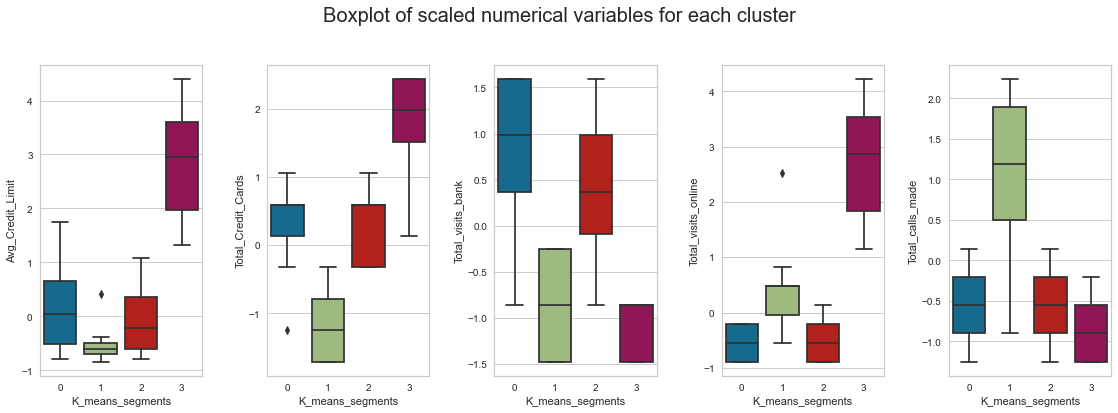

In [76]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(
        ax=axes[ii],
        y=subset_scaled_df[num_col[counter]],
        x=subset_scaled_df["K_means_segments"],
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

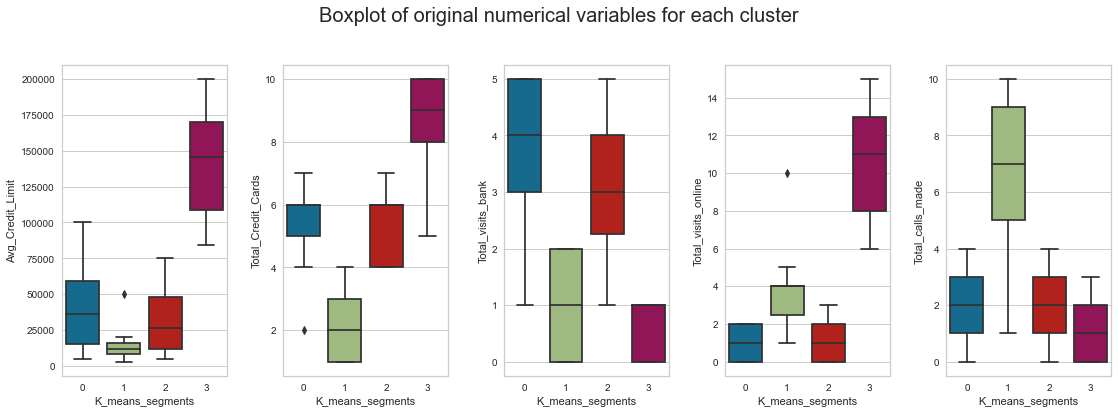

In [77]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)
counter = 0
for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df[num_col[counter]], x=df["K_means_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

## Insights

- **Cluster 0**:

     - Average credit limit is 31226 with total credit cars as 5.
     -The customers also visit bank more often  with 4 - 5 visits.
     -They have less online presence of around 1 visit. 
   
- **Cluster 1**:

    - Highest cusomters are in this segment 221.
    -The average credit limit is 12000.
    -Customers have around 2 credit cards.
    -They do not always come to the bank with at maximum of 1 visit.
    -They often visit online with average of 4 visits.
    -They call bank very often to averaging of 8 calls in this cluster.
    
- **Cluster 2**:

    - Average Credit Limit is 141000.
    -Credit cards range up to 8 to 9 with visits to often z times.
    -They visit online very often 10 times.


- **Cluster 3**:

    - Average credit limit is 35000
    -Total credit cards for them 5 to 6
    -They visit bank with 3 visits, may visit online 1
    -They also make calls  form twice of 3 times 

**Let's compare Cluster vs Brand**

In [78]:
pd.crosstab(df.K_means_segments, df.Total_Credit_Cards).style.highlight_max(
    color="lightgreen", axis=0
)

Total_Credit_Cards,1,2,3,4,5,6,7,8,9,10
K_means_segments,,,,,,,,,,
0,0,1,0,39,33,57,43,0,0,0
1,59,63,53,48,0,0,0,0,0,0
2,0,0,0,64,40,59,51,0,0,0
3,0,0,0,0,1,1,7,11,11,19


<AxesSubplot:xlabel='K_means_segments'>

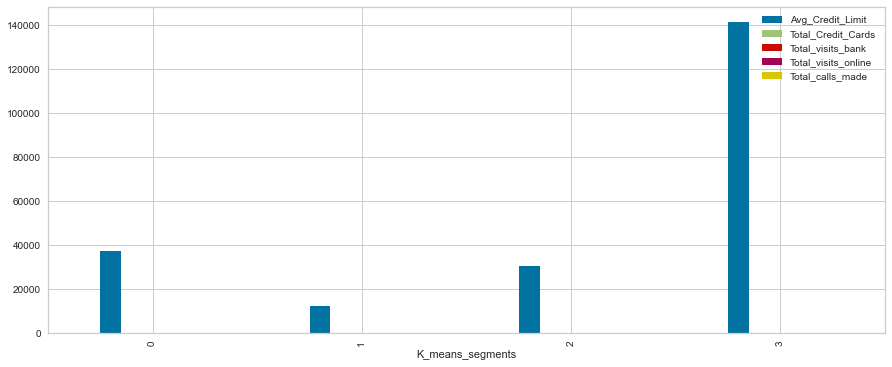

In [79]:
df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

**Observations**

- Customers with 4 credit cards are spread over all the segments.
- Total customers have highest concentration with 4,5,6,7 credit cards per customer.

<AxesSubplot:xlabel='Component 1', ylabel='Component 2'>

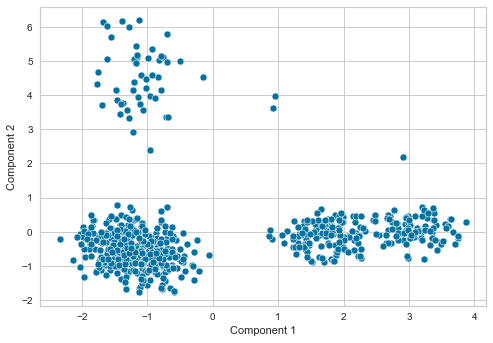

In [80]:
sns.scatterplot(data=reduced_df_pca, x="Component 1", y="Component 2")